In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


In [9]:
#literally just reads the file into a list
def readStreamRes(filename):
    file = open(filename)
    lines = file.readlines()
    lists = []
    for line in lines:
        lists.append(line.split())
    return lists

In [10]:
def data(filename):
    daList = readStreamRes(filename)
    df = pd.DataFrame.from_records(daList[1:], columns=daList[0][:5])
    return df
        

In [52]:
#gets graph data for a desired variable with the respective frequencies

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

def graphData(filename, x):
    df = data(filename)
    grouped = df.groupby('cores')
    arr = []
    for cores, group in grouped:
        freqs = group['freq'].tolist()
        rates = group[x].tolist()
        arr.append([cores, freqs, rates])
    df = pd.DataFrame(arr)
    #data got
    points = []
    for i in range(0, int(len(arr)/2)):
        if len(arr[i][1]) is 6:
            plt.plot(arr[i][1], arr[i][2], label = arr[i][0])
    plt.xlabel('frequency')
    plt.legend()
    plt.show()
    for i in range(int(len(arr)/2), int(len(arr))):
        if len(arr[i][1]) is 6:
            plt.plot(arr[i][1], arr[i][2], label = arr[i][0])
    set_size(5,5)
    plt.legend()
    plt.figure()


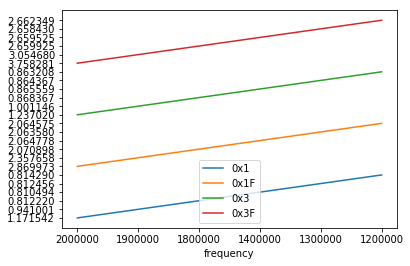

None


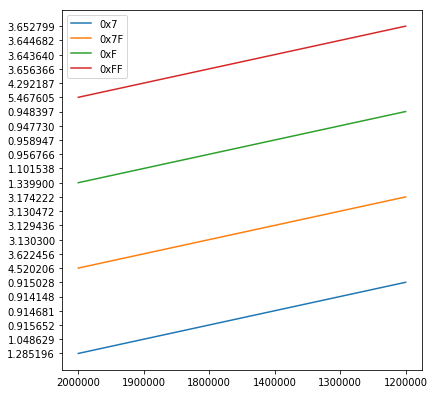

<Figure size 432x288 with 0 Axes>

In [12]:
print(graphData('STREAM.results', 'Power'))


TypeError: <lambda>() missing 1 required positional argument: 'height'

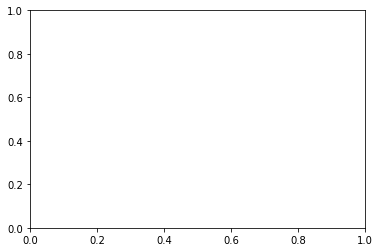

In [54]:
lists = []
for filename in os.listdir(os.getcwd()):
    add = 0
    ctr = 0 
    if str(filename[:1]) is "h" and (str(filename[4:] is '.log')):
        x = readStreamRes(filename)
        for i in range(1, len(x)):
            add += float(x[i][5])
            ctr += 1
        lists.append([filename,(add/ctr)])
numbers = []
char = []
for j in range(0, len(lists)):
    lists[j][0] = lists[j][0][10:22]
    numbers.append(lists[j][1])
    char.append(lists[j][0])
    
y_pos = np.arange(len(char))
plt.bar(y_pos, numbers, align='center', alpha=0.5)
plt.xticks(numbers, char)
plt.xlabel('Cores')
plt.title('(Cores and Freq) x Window Rate')
set_size(15,15)

plt.show()
